## **Amazon Stock Price Prediction**

In [1]:
# Stock Price : This Program uses Artificial Recurrent Neural Networks called Long Short Term Memory (LSTM)
#               to Predict the closing stock price of a corporation (Amazon Inc.) Using the Past Stock Price. 

In [2]:
# Libraries 
import math
import pandas as pd 
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# stock quote
df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2020-08-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-07-27,3098.000000,3015.770020,3062.000000,3055.209961,4170500,3055.209961
2020-07-28,3077.090088,2995.760010,3054.270020,3000.330078,3126700,3000.330078
2020-07-29,3039.159912,2996.770020,3030.989990,3033.530029,2974100,3033.530029


In [4]:
# total records
df.shape

(2159, 6)

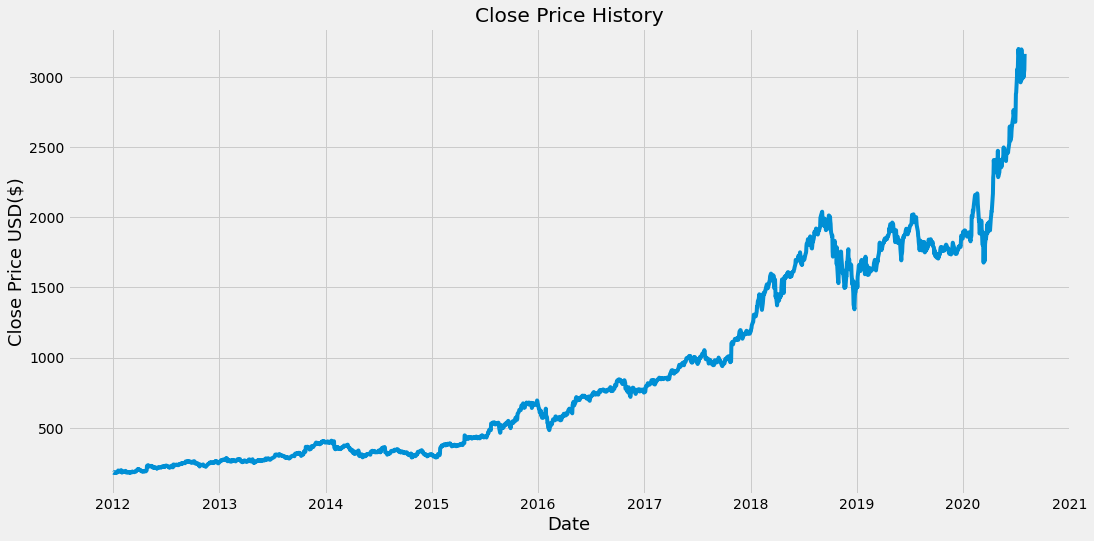

In [5]:
# Closing Price History
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [6]:
# Taking Required column which is 'Close'
data = df.filter(['Close'])

# Converting df to numpy array 
dataset = data.values

# Taking 80% data len for training the model 
train_data_len = math.ceil( len(dataset)* .8 )
train_data_len

1728

In [7]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.02511056e-03],
       [5.22475282e-04],
       [5.55545318e-04],
       ...,
       [9.44951681e-01],
       [9.51019614e-01],
       [9.88320354e-01]])

In [8]:
# splitting the scaled data to create train set 
train_data = scaled_data[0:train_data_len, :]

# X_train , y_train  # taking 60 best values
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(X_train)
    print(y_train)

[array([0.00102511, 0.00052248, 0.00055555, 0.00220895, 0.00086969,
       0.00112762, 0.00098212, 0.        , 0.0008234 , 0.0018948 ,
       0.00446749, 0.0061242 , 0.0049602 , 0.00335971, 0.00366063,
       0.00392518, 0.00575053, 0.00642842, 0.00536363, 0.00612089,
       0.00116731, 0.00191464, 0.00388549, 0.00238421, 0.00273142,
       0.003158  , 0.00299266, 0.00317784, 0.00517845, 0.00508256,
       0.00282401, 0.00132272, 0.00217257, 0.00209321, 0.00153767,
       0.00097882, 0.00105818, 0.00085977, 0.00260246, 0.00124336,
       0.0013591 , 0.0011144 , 0.00143185, 0.00170631, 0.00259254,
       0.00387227, 0.00277441, 0.00246688, 0.00286369, 0.00209321,
       0.00281078, 0.00301581, 0.00317123, 0.00542316, 0.00522475,
       0.0054463 , 0.0063193 , 0.00890852, 0.00975838, 0.00834306])]
[0.00948391005006765]
[array([0.00102511, 0.00052248, 0.00055555, 0.00220895, 0.00086969,
       0.00112762, 0.00098212, 0.        , 0.0008234 , 0.0018948 ,
       0.00446749, 0.0061242 , 0.004

In [9]:
# Converting to Numpy Arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1668, 60)

In [11]:
# Reshaping Data to 3D for LSTM 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1668, 60, 1)

In [12]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 28s 17ms/step - loss: 6.7806e-04


In [15]:
# Splitting the Scaled datset to create test set 
test_data = scaled_data[train_data_len - 60:, :]

# X_test , y_test 
X_test = []
y_test = dataset[train_data_len:, :]

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [16]:
# Converting to numpy array 
X_test = np.array(X_test)

In [17]:
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
# Predictions 
preds = model.predict(X_test)
predictions = scaler.inverse_transform(preds)

In [19]:
# RMSE 
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse 

56.955226818536104

In [20]:
# Plot the Data 
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
# Original & Predicted
valid

,Close,Predictions
Date,,
2018-11-13,1631.170044,1658.678955
2018-11-14,1599.010010,1658.014893
2018-11-15,1619.439941,1652.051025
2018-11-16,1593.410034,1645.029053
2018-11-19,1512.290039,1635.961914
...,...,...
2020-07-27,3055.209961,2867.400879
2020-07-28,3000.330078,2862.395508
2020-07-29,3033.530029,2854.913330


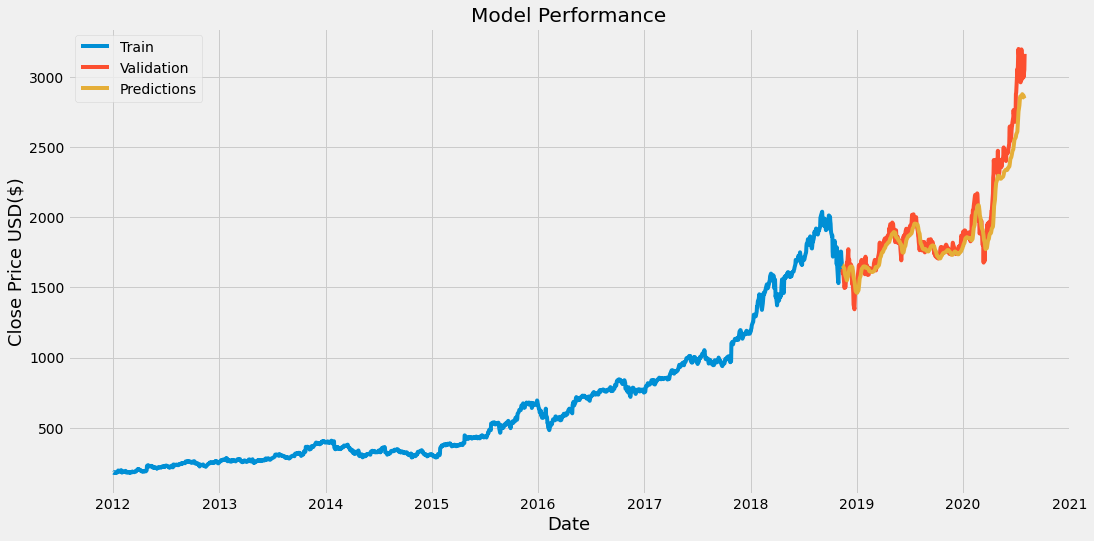

In [22]:
# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Validation', 'Predictions'], loc='best')
plt.show()

In [23]:
# Get the Quote 
amazon_quote = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2020-08-01')

# Feature Selection
new_df = amazon_quote.filter(['Close'])

# Taking last 60 days Close price values and converting to numpy array
last_60_days = new_df[-60:].values

# Scale the data b/n 0 to 1
last_60_days_scaled = scaler.fit_transform(last_60_days)

# Creating empty X_test list
X_test = []

# Appending past 60 days 
X_test.append(last_60_days)

# Convert the X_test to numpy array 
X_test = np.array(X_test)

# Reshape to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prediction 
preds = model.predict(X_test)

# Undo scaling 
predictions = scaler.inverse_transform(preds)

# Print the Predictions 
print(predictions)

[[3517.595]]


In [24]:
# Get the Quote
Amazon_quote = web.DataReader('AMZN', data_source='yahoo', start='2020-08-02', end='2020-08-03')
print(Amazon_quote['Close'])

Date
2020-08-03    3111.889893
Name: Close, dtype: float64
